# **Customer Segmentation**

Unsupervised clustering of a company's customer database to form Cluster Segmentation.

In this project i'll be performing unsupervised clustering of a company's customer database involves using machine learning techniques to segment customers into distinct groups based on their similarities without predefined labels. This aims to identify meaningful patterns and behaviors within the customer data, enabling the company to tailor marketing strategies, enhance customer service, and optimize product offerings for each group. By clustering customers into segments, the company can better understand their needs, improve targeting, and ultimately drive customer satisfaction and business growth.

## Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Loading the Data

For more information about the data [here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

In [2]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 48.0MB/s]


In [3]:
!unzip /content/customer-personality-analysis.zip

Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [4]:
# Loading the dataset
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

In [5]:
# Data size
print('Number of datapoints: ', df.shape[0])
print('Number of features: ', df.shape[1])
df.head(10)

Number of datapoints:  2240
Number of features:  29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Data Cleaning & Feature Engineering

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

I will drop both 'Z_CostContact' & 'Z_Revenue' & 'ID' columns, as they not related to problem statement.

In [7]:
# Drop 'Z_CostContact','Z_Revenue' columns
df.drop(columns = ['Z_CostContact','Z_Revenue','ID'], inplace=True)

From the above output, we can see that  

*   Dt_customer is 'object' type not date.
*   Income column has null values.



In [8]:
# % of nulls on columns
df.isnull().sum()/df.shape[0]*100

,0
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000


In [9]:
# Drop rows with nulls
df.dropna(inplace=True)
print('Total number of points after drop rows with nulls: ', df.shape[0])

Total number of points after drop rows with nulls:  2216


In [10]:
# Changing Dt_customer to be 'date' type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print('the newest customer: ',max(df['Dt_Customer']))
print('the oldest customer: ',min(df['Dt_Customer']))

the newest customer:  2014-06-29 00:00:00
the oldest customer:  2012-07-30 00:00:00


In the next steps i will perform some steps to engineer some new features:


*   Extract 'Age' of the customer from 'Year_Birth'.
*   Extract 'Is_parent' & 'No_partner'.
*   Extract 'Family_size' based on 'Kidhome', 'Teenhome' and 'Marital_Status'.
*   Extract 'Total_spent' for each customer based on Mnt* columns.
*   Extract 'Customer_for' from 'Dt_customer'.



In [11]:
# create 'Age' column
df['Age'] = 2024 - df['Year_Birth']

In [12]:
# create 'No_children' column
df['No_children'] = df['Kidhome'] + df['Teenhome']

In [13]:
# create 'Is_parent' column
df['Is_parent'] = np.where(df['No_children'] >0,1,0)

In [14]:
# exploring 'Marital_Status' column
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [15]:
# create 'No_partner' column based on 'Marital_Status'
df['No_partner'] = np.where(df['Marital_Status'].isin(['Absurd','Alone','Widow','YOLO','Single','Divorced']),1,2)

In [16]:
# create 'Family_size' column
df['Family_size'] = df['No_children'] + df['No_partner']

In [17]:
# create 'Total_spent' column
df['Total_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
# create 'Customer_for' column
df['Customer_for'] = 2024 - df['Dt_Customer'].dt.year

In [19]:
# Exploring data after added features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-null   i

Next, i will explore some important features for treating the outliers.

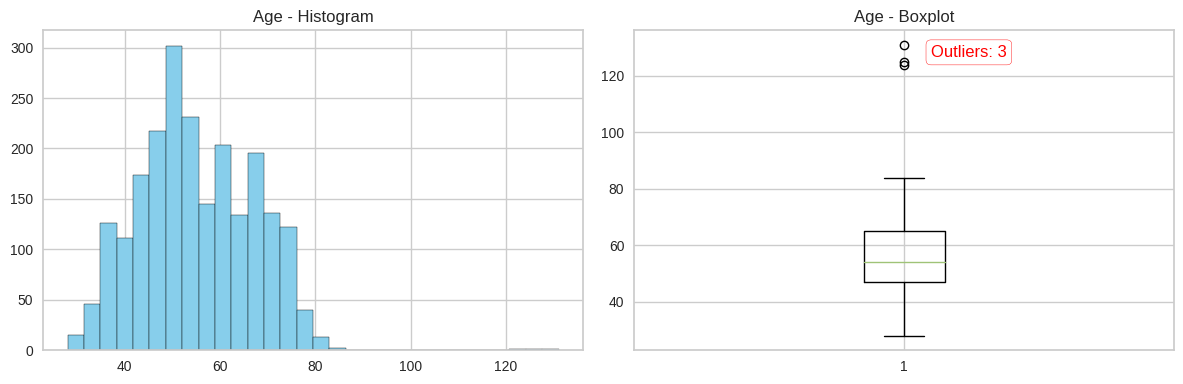

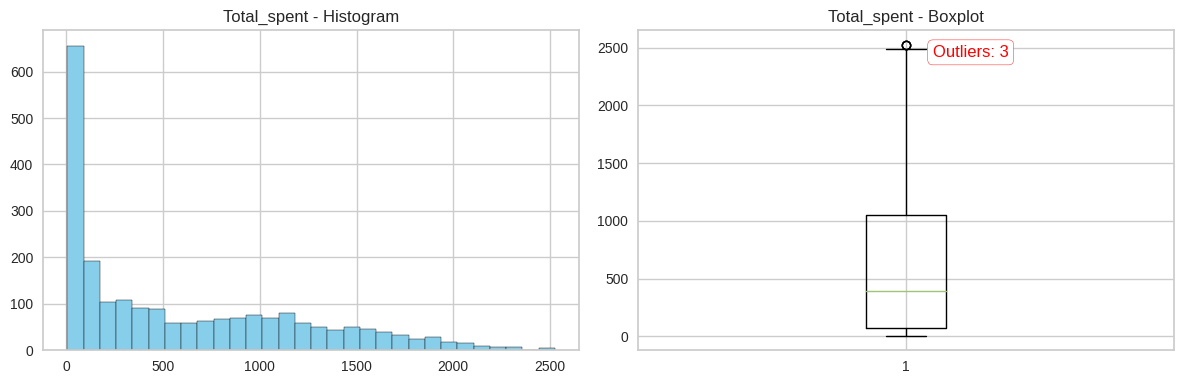

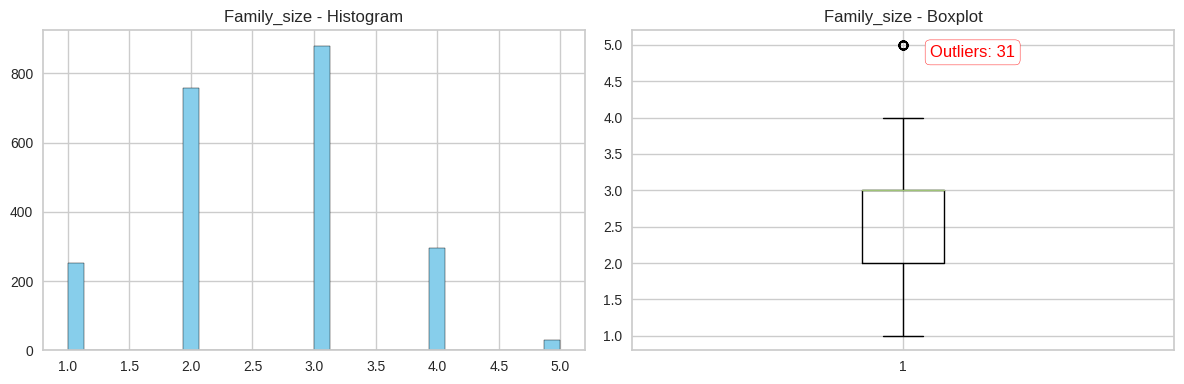

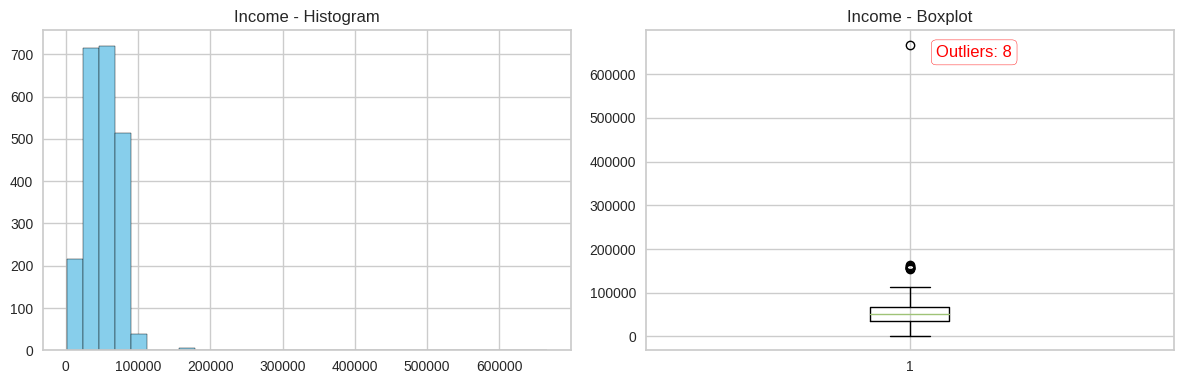

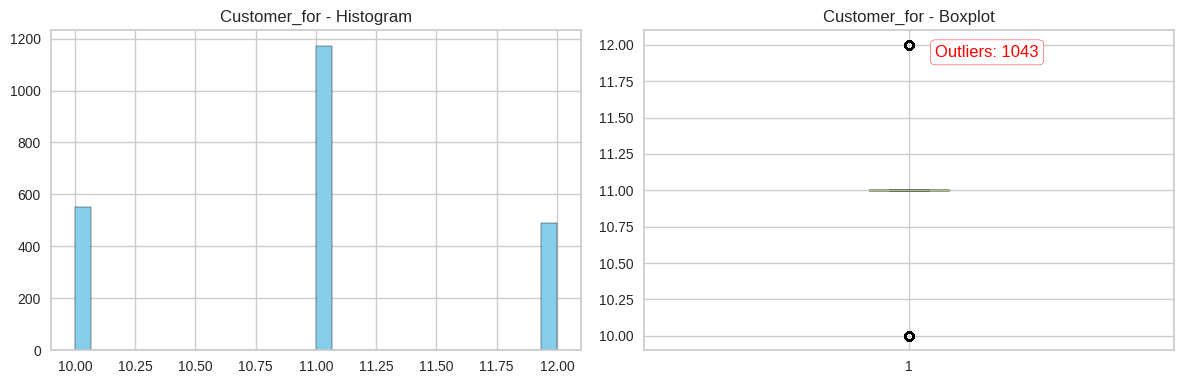

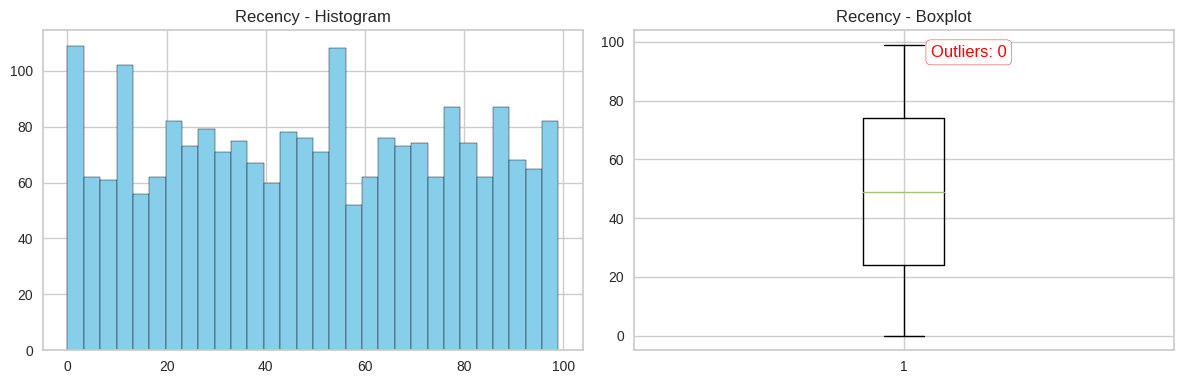

In [20]:
# Exploring important features outliers
to_explore = ['Age','Total_spent','Family_size','Income','Customer_for','Recency']

for column in df[to_explore].columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    outlier_count = len(outliers)

    # Histogram
    ax[0].hist(df[column], bins=30, color='skyblue', edgecolor='black')
    ax[0].set_title(f'{column} - Histogram')

    # Boxplot
    ax[1].boxplot(df[column], vert=True)
    ax[1].set_title(f'{column} - Boxplot')

    # Annotating the count of outliers
    plt.text(x=1.05, y=df[column].max(), s=f'Outliers: {outlier_count}', fontsize=12, color='red',
         ha='left', va='top', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))


    plt.tight_layout()
    plt.show()

In [21]:
# exploring Age outliers
indexes = df[df['Age']>100].index
df.loc[indexes]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Age,No_children,Is_parent,No_partner,Family_size,Total_spent,Customer_for
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,0,1,0,124,1,1,1,2,65,11
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,0,0,131,1,1,1,2,22,10
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,0,0,0,125,0,0,2,2,1853,11


In [22]:
# replacing 'Age' outliers with median age according to 'Education' column
for index in indexes:
  df.loc[index,'Age'] = df[df['Education']==df.loc[index,'Education']]['Age'].median()

It seems that no need to do anything for 'Total_spent','Family_size' as almost they have accepted values and not far from distribution.
Also, 'Customer_for' values no strange values for it, and i won't make any changes.




In [23]:
#exploring 'Income' outliers
indexes = df[df['Income']>120000].index
df.loc[indexes]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Age,No_children,Is_parent,No_partner,Family_size,Total_spent,Customer_for
164,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,0,0,0,51,1,1,2,3,1608,10
617,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,0,0,0,48,2,1,2,4,107,11
655,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,...,0,0,0,49,0,0,1,1,6,10
687,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,0,0,0,42,0,0,2,2,1717,12
1300,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,0,0,0,53,1,1,2,3,59,11
1653,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,0,0,0,47,0,0,2,2,1730,11
2132,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,75,0,0,2,2,8,11
2233,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,0,0,0,47,1,1,2,3,62,11


I see that this outliers in 'Income' columns has no high corresponding values in 'Total_spent', so i will replace the outliers with the max value of 'Income' according to their 'Education' category

In [24]:
# replacing 'Income' outliers with max income according to  'Education' column after excluding outliers
for index in indexes:
  df.loc[index,'Income'] = df[(df['Income']<120000) & (df['Education']==df.loc[index,'Education'])]['Income'].max()

In [25]:
# showing correlation between features to select features for ML model
corr = df.select_dtypes(exclude='object').corr()
corr

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,No_children,Is_parent,No_partner,Family_size,Total_spent,Customer_for
Year_Birth,1.000000,-0.204616,0.233615,-0.350791,-0.020305,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,-0.006717,-0.030407,0.023692,-0.973004,-0.087398,0.012448,0.002033,-0.071207,-0.113487,0.027288
Income,-0.204616,1.000000,-0.525652,0.037389,0.024680,0.005743,0.711562,0.525492,0.692995,0.538179,...,0.107416,-0.030795,0.167960,0.206592,-0.349603,-0.409330,-0.006630,-0.292636,0.811163,-0.026360
Kidhome,0.233615,-0.525652,1.000000,-0.039869,0.054583,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,-0.081868,0.040978,-0.077909,-0.237689,0.687794,0.520454,0.026788,0.582982,-0.557899,-0.052943
Teenhome,-0.350791,0.037389,-0.039869,1.000000,-0.018144,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,-0.015521,0.003307,-0.153901,0.361793,0.697907,0.587441,0.031651,0.593915,-0.138153,0.009488
Dt_Customer,-0.020305,0.024680,0.054583,-0.018144,1.000000,-0.025963,-0.168049,-0.067958,-0.089577,-0.081834,...,-0.006123,-0.033279,-0.196479,0.013841,0.025941,-0.000888,0.010851,0.027187,-0.158577,-0.910599
Recency,-0.016295,0.005743,0.011492,0.013838,-0.025963,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.001400,0.013637,-0.199766,0.015726,0.018290,0.002485,-0.001371,0.014402,0.020066,0.027064
MntWines,-0.159451,0.711562,-0.497336,0.003747,-0.168049,0.015721,1.000000,0.387024,0.568860,0.397721,...,0.206185,-0.039470,0.246299,0.165206,-0.353748,-0.343094,-0.007244,-0.296388,0.893136,0.154991
MntFruits,-0.017747,0.525492,-0.373396,-0.176558,-0.067958,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.009980,-0.005324,0.122443,0.014006,-0.395901,-0.411963,-0.025988,-0.341154,0.613249,0.054961
MntMeatProducts,-0.033697,0.692995,-0.439261,-0.261122,-0.089577,0.022518,0.568860,0.547822,1.000000,0.573574,...,0.043521,-0.023782,0.237746,0.034253,-0.504545,-0.574931,-0.023313,-0.429592,0.845884,0.078562
MntFishProducts,-0.040425,0.538179,-0.388884,-0.205242,-0.081834,0.000551,0.397721,0.593431,0.573574,1.000000,...,0.002345,-0.021220,0.108145,0.041643,-0.427841,-0.450318,-0.017986,-0.363341,0.642371,0.067327


<Axes: >

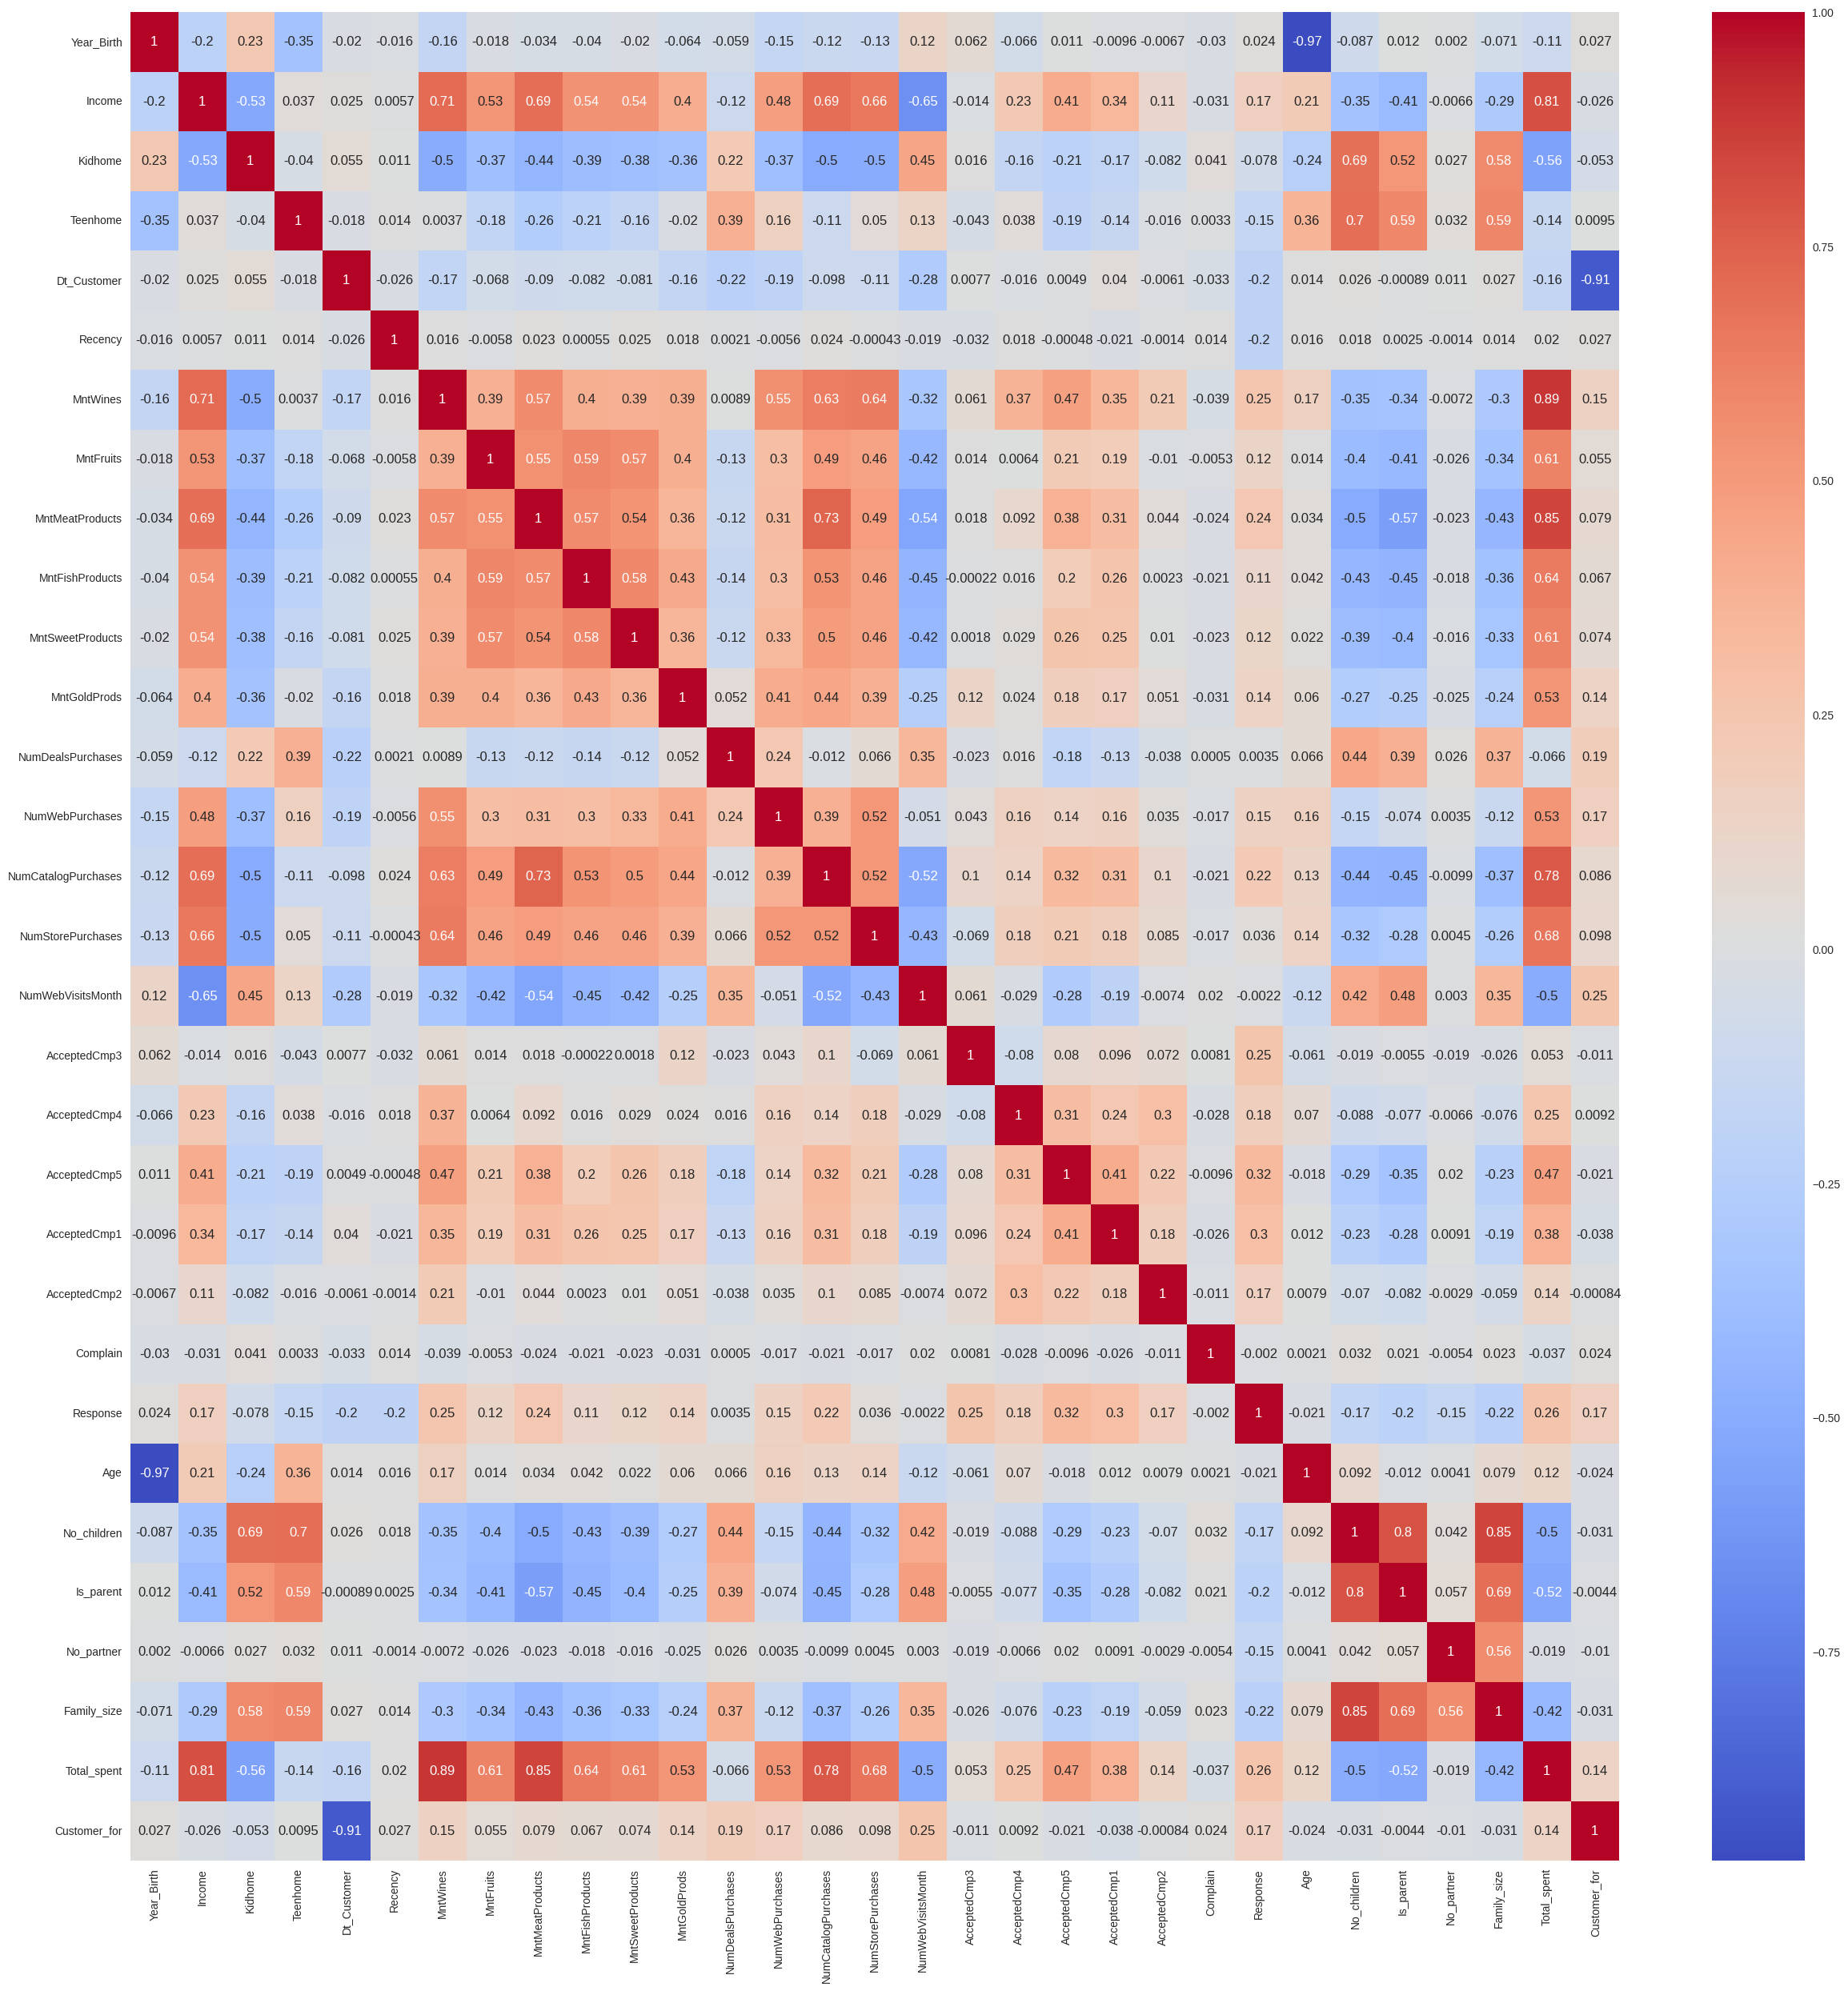

In [26]:
# correlation heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True,cmap='coolwarm')

Now, the data is clean and i will go forward data preprocessing

## Data Preprocessing

In this part, i will:

*   Encoding 'object' column on data.
*   Making a copy from the data with selected features to use in ML model
*   Normalizing the data.
*   Dimensionality Reduction (PCA)



In [27]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-null   i

In [28]:
# exploring 'Education' column
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [29]:
# minimizing 'Education' column values
df['Education'] = df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [30]:
# Encoding 'Education' column
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

Next i will making a copy of the data with selected features for ML model.
I will drop some categorical columns and encoded columns that was replaced with other numerical columns using calculations such as 'Is_parent' and 'Family_size'

In [31]:
# making a copy of the data with selected features for ML model
ds = df.drop(columns=['Year_Birth','Dt_Customer','Is_parent','Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [32]:
# Exploring data statistics for outliers
ds.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,No_children,No_partner,Family_size,Total_spent,Customer_for
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.611011,51839.891245,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.009477,55.078069,0.947202,1.645307,2.592509,607.075361,10.971570
std,0.683469,20960.561346,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.096907,11.693789,0.749062,0.478528,0.905722,602.900476,0.685618
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,1.000000,1.000000,5.000000,10.000000
25%,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,47.000000,0.000000,1.000000,2.000000,69.000000,11.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,54.000000,1.000000,2.000000,3.000000,396.500000,11.000000
75%,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,65.000000,1.000000,2.000000,3.000000,1048.000000,11.000000
max,2.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,84.000000,3.000000,2.000000,5.000000,2525.000000,12.000000


From previous i can see that columns like 'MntFruits' may have outliers, but i already checked the outliers for 'Total_spent' column and it was normal for me. So, no more changes will be performed on data for outliers.

In [33]:
# Normalizing the data
scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,No_children,No_partner,Family_size,Total_spent,Customer_for
0,-0.894187,0.300542,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,-0.097812,1.019740,-1.264803,-1.348829,-1.758673,1.675488,1.500343
1,-0.894187,-0.262261,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,-0.097812,1.276344,1.405806,-1.348829,0.450009,-0.962358,-1.417393
2,-0.894187,0.943561,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,-0.097812,0.335462,-1.264803,0.741384,-0.654332,0.280250,0.041475
3,-0.894187,-1.202238,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-0.097812,-1.289699,0.070501,0.741384,0.450009,-0.919224,-1.417393
4,0.569268,0.307939,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,-0.097812,-1.033095,0.070501,0.741384,0.450009,-0.307044,-1.417393


Next, i will use PCA for Dimentionality Reduction. In my opinion i will reduce  them to 6 dimensions as i see that data has 6 major charecteristics (income, total spent, family size, age, customer duration and the eucation) and the rest of the features are related to them with one way or another. So, trying to balance between information loss and reduction i'll use 6 dimensions.

In [34]:
# Dimentionality reduction using PCA
pca = PCA(n_components=6)
ds_pca = pd.DataFrame(pca.fit_transform(ds), columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
ds_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.727129,-0.275380,2.398284,-0.142021,1.250407,-0.012737
1,-2.793239,0.133611,-1.670045,-1.464672,1.675804,-0.916047
2,2.303907,-0.472764,-0.160113,-0.004028,-0.566890,-0.455695
3,-2.643961,-1.466607,-0.673011,1.233086,0.189232,-1.020374
4,-0.519231,0.008244,-0.399813,1.591111,0.266649,0.502911


## Clustering

I will make segmentation using KMean model.

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

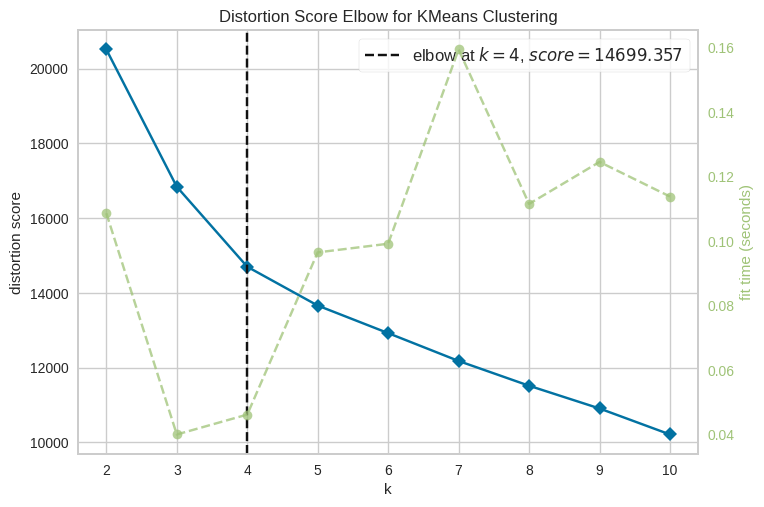

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# using elbow method to choose number of clusters
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(ds_pca)
Elbow_M.show()


From the elbow method, i will choose 4 clusters

In [57]:
# creating clustering model with KMeans
km = KMeans(n_clusters=4, random_state=42, init="k-means++", n_init=10)
df['kmeans_clusters'] = ds_pca['kmeans_clusters'] = km.fit_predict(ds_pca)     # storing the clusters on a column of original data df and ds_pca

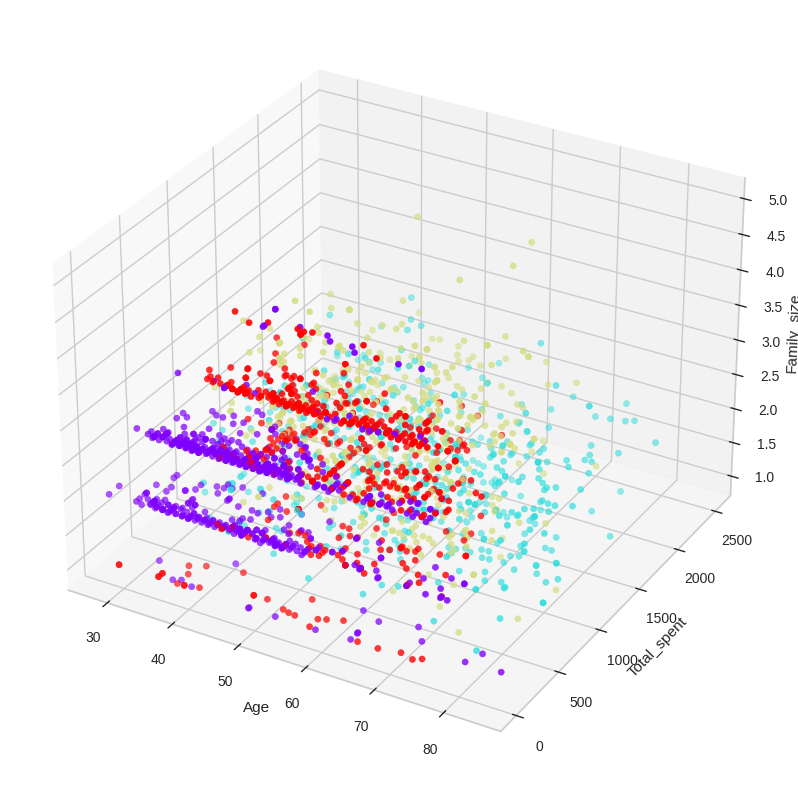

In [58]:
# scattering the data with clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Total_spent'], df['Family_size'], c=df['kmeans_clusters'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Total_spent')
ax.set_zlabel('Family_size')
plt.show()

In [59]:
# Evaluate the model using silhoutte score
print('KMeans Silhouette Score: ', metrics.silhouette_score(ds_pca, ds_pca['kmeans_clusters']))

KMeans Silhouette Score:  0.34706940012339904


I will try to use DBSCAN model for clustering

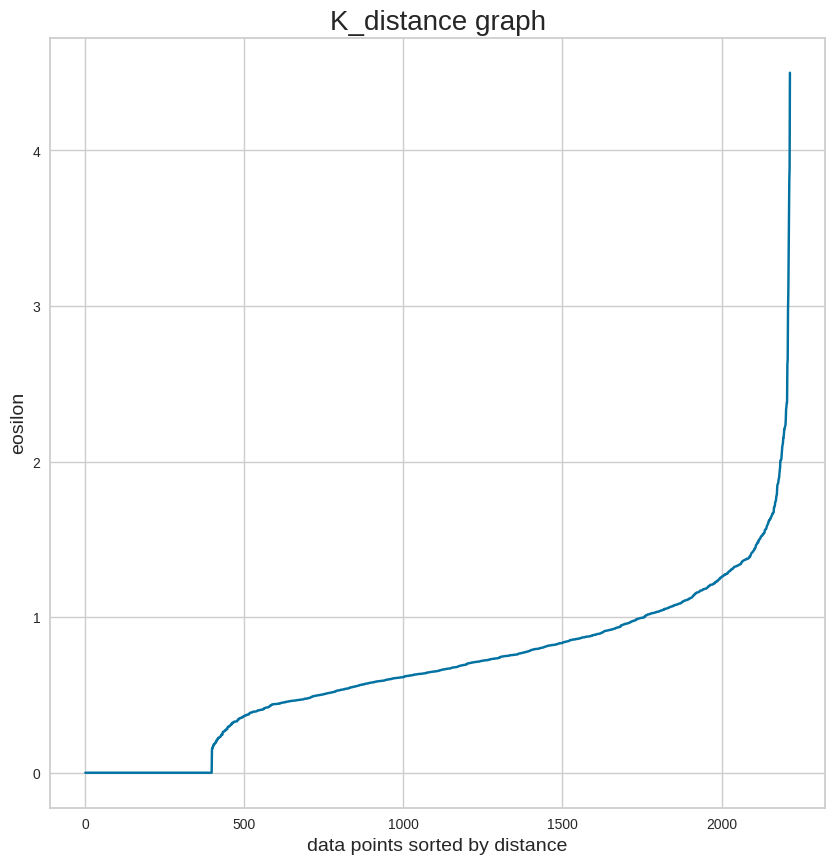

In [39]:
# Use k_distance_graph to try finding suitable range of eps
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(ds_pca)
distances, indices = nbrs.kneighbors(ds_pca)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K_distance graph', fontsize=20)
plt.xlabel('data points sorted by distance', fontsize=14)
plt.ylabel('eosilon', fontsize=14)
plt.show()

I will try to find best parameters for DBSCAN and silhoutte score

In [40]:
# finding dbscan best parameters
from sklearn.cluster import DBSCAN as DB

# Define parameter grid
eps_values = np.arange(1, 2.5, 0.1)  # Range of eps values to try
min_samples_values = range(2, 21)      # Range of min_samples values to try

# Initialize variables to track the best parameters and score
best_score = -1
best_params = {'eps': None, 'min_samples': None}
best_labels = None

# Grid search over parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbcan = DB(eps=eps, min_samples=min_samples)
        labels = dbcan.fit_predict(ds)

        # Calculate silhouette score only if there are more than 1 clusters
        if len(set(labels)) > 1 and -1 in set(labels):
            score = metrics.silhouette_score(ds, labels)

            # Update best parameters if current score is better
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")


Best Parameters: {'eps': 2.4000000000000012, 'min_samples': 8}
Best Silhouette Score: 0.0258


In [41]:
# number of clusters
print('Number of clusters: ', len(set(best_labels)))

Number of clusters:  10


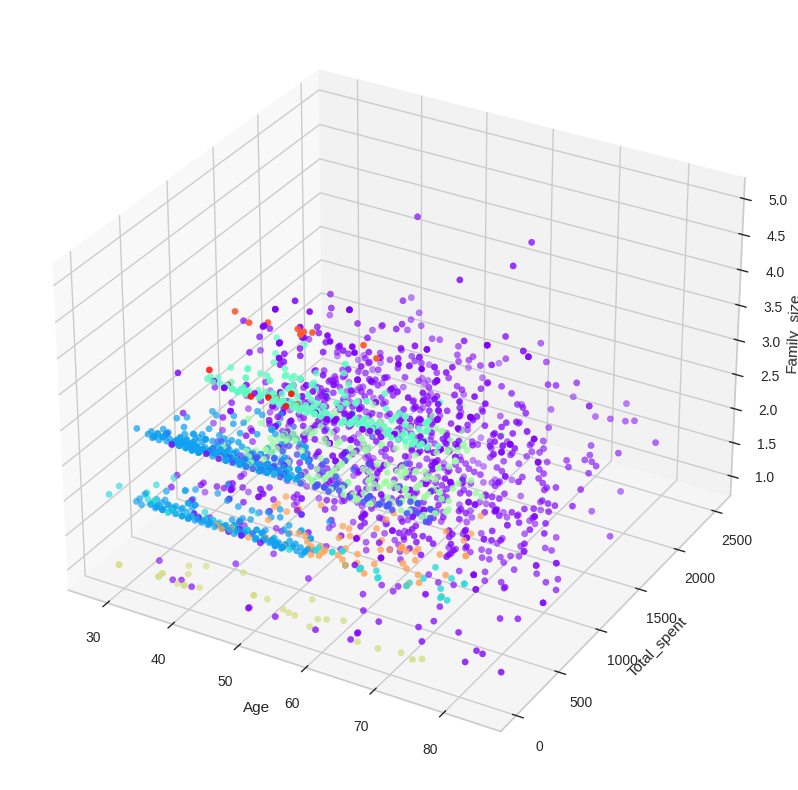

In [42]:
# scattering clusters
df['dbscan_clusters'] = ds_pca['dbscan_clusters'] = best_labels
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Total_spent'], df['Family_size'], c=df['dbscan_clusters'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Total_spent')
ax.set_zlabel('Family_size')
plt.show()

In [60]:
# Evaluate the model using silhoutte score
print('DBSCAN Silhouette Score: ', metrics.silhouette_score(ds, ds_pca['dbscan_clusters']))

DBSCAN Silhouette Score:  0.025789751735283924


From the previous, it seems that KMeans has higher score than DBSCAN, also DBSCAN has 10 cluster which doesn't make sense for business.
From thae data we expect that it will be on spherical clusters not arbitrary shape.
So, i will continue based on KMeans model.

## Data Insights

Based on the previous Kmeans clustering. in the following section i will try to get insights from the data about each cluster.

Showing clusters distribution

<ipython-input-44-5f8633ac6f71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["kmeans_clusters"], palette= pal)


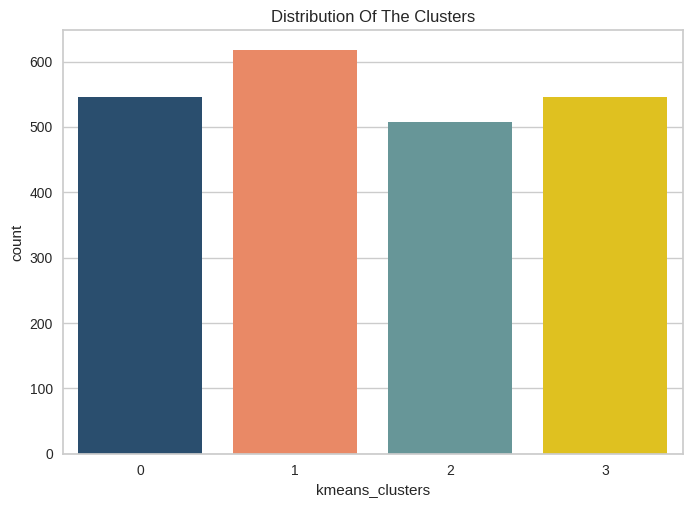

In [44]:
#Plotting countplot of clusters
pal = ["#1F4E79", "#FF7F50", "#5F9EA0", "#FFD700"]
pl = sns.countplot(x=df["kmeans_clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

From previous graph, it seems that data is fairly distributed.

Clusters view based on Income and Total_spent

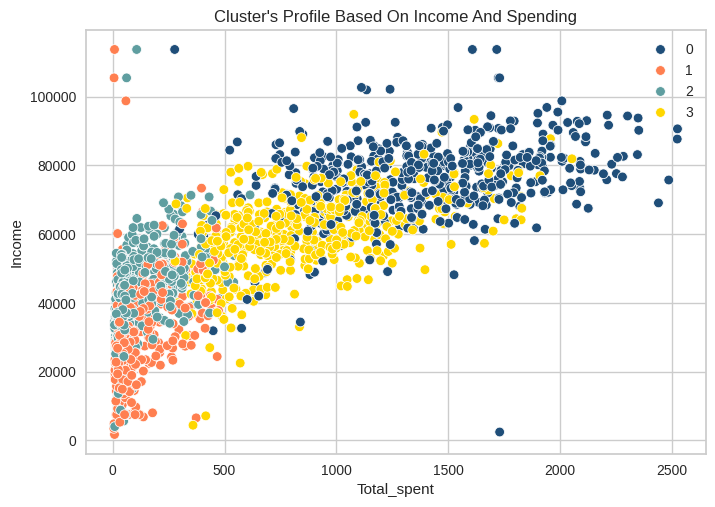

In [45]:
pl = sns.scatterplot(data = df,x=df["Total_spent"], y=df["Income"],hue=df["kmeans_clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [67]:
# Compute the median of 'Total_spent' and 'Income' for each cluster
cluster_averages = df.groupby('kmeans_clusters')[['Total_spent', 'Income']].mean()
cluster_averages

,Total_spent,Income
kmeans_clusters,,
0,99.367733,32154.388081
1,1364.309091,75737.249091
2,890.238202,60459.373034
3,244.630394,45394.131332


Income vs Total_spent plot and table show the clusters pattern:
*   cluster 0: low spending & low income
*   cluster 1: high spending & high income
*   cluster 2: avg spending & high income
*   cluster 3: low spending & avg income


In [47]:
# Exploring clusters and their densities
fig = px.box(df, x="kmeans_clusters", y="Total_spent", color="kmeans_clusters", points="all", color_discrete_sequence=pal)
fig.update_traces(marker=dict(size=8, opacity=0.5), selector=dict(mode='markers'))
fig.show()

In [48]:
# count of clusters
df['kmeans_clusters'].value_counts()

,count
kmeans_clusters,
1,617
3,546
0,545
2,508


It seems that the data almost fair for all clusters, with cluster 1 is tiny higher.

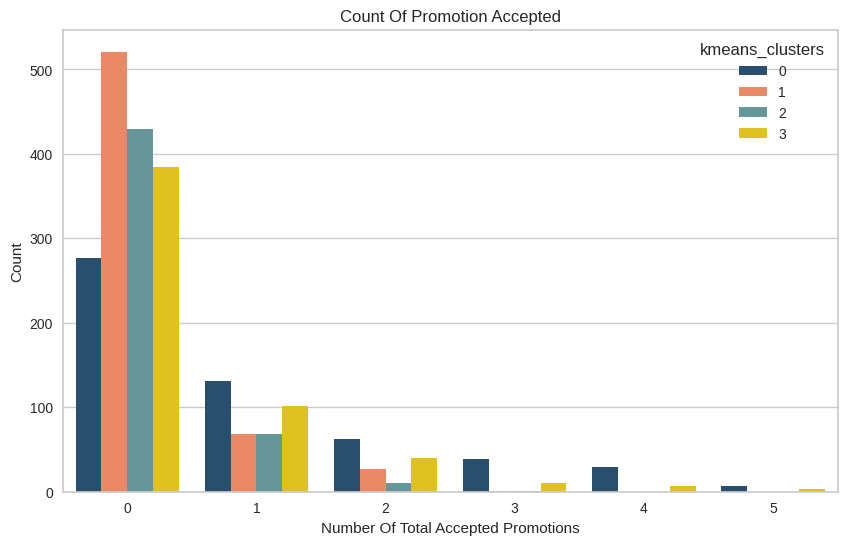

In [49]:
# Creating a feature to get the sum of accepted promotions
df["Total_Promos"] = (df["AcceptedCmp1"] + df["AcceptedCmp2"] +
                      df["AcceptedCmp3"] + df["AcceptedCmp4"] +
                      df["AcceptedCmp5"] + df['Response'])

# Plotting count of total campaigns accepted
plt.figure(figsize=(10, 6))
pl = sns.countplot(x=df["Total_Promos"], hue=df["kmeans_clusters"], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
pl.set_ylabel("Count")
plt.show()

In [50]:
df['Total_Promos'].value_counts()

,count
Total_Promos,
0,1611
1,369
2,139
3,51
4,36
5,10


**It seem that compaigns had no effect on the customers. So, it needs more attention for future.**

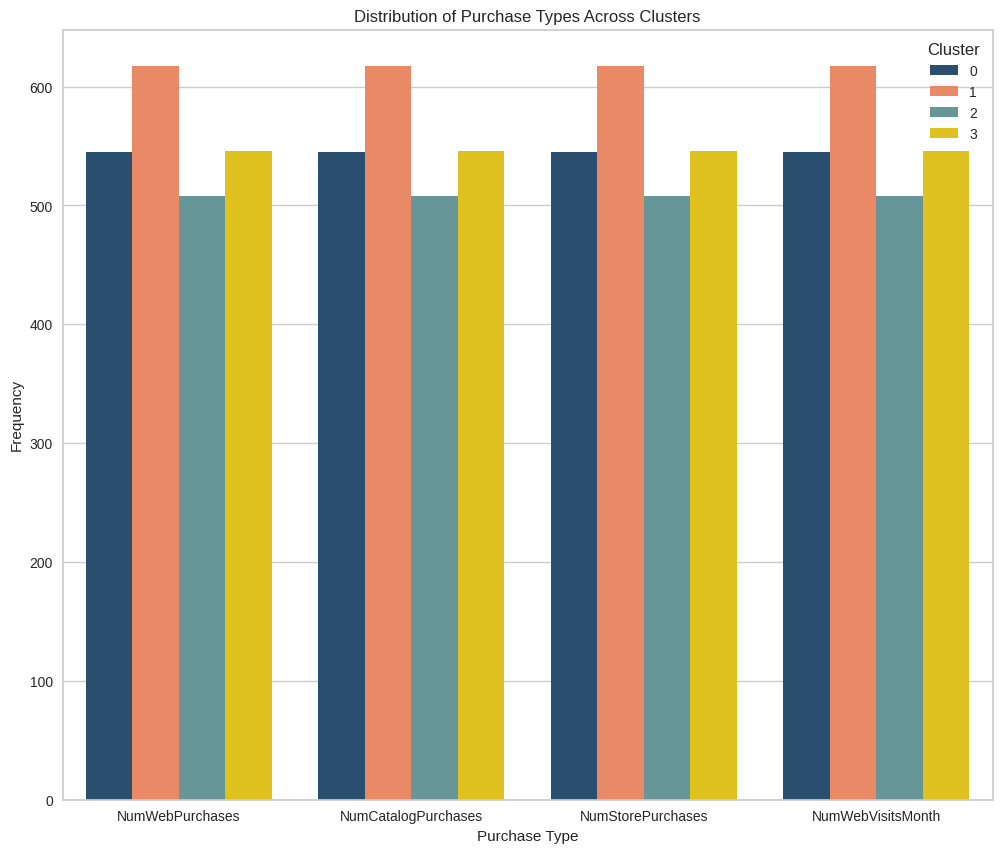

In [51]:
# Melt the DataFrame to long format
df_melted = df.melt(id_vars='kmeans_clusters',
                    value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
                    var_name='Purchase_Type',
                    value_name='Count')

# Plotting count of each feature with cluster hues to see most common purchase types.
plt.figure(figsize=(12, 10))
pl = sns.countplot(x='Purchase_Type', hue='kmeans_clusters', data=df_melted, palette=pal, dodge=True)
pl.set_title("Distribution of Purchase Types Across Clusters")
pl.set_xlabel("Purchase Type")
pl.set_ylabel("Frequency")
plt.legend(title='Cluster')
plt.show()

From the figure, it seems that online website is working well with all clusters. Also, all clusters have a common behaviour of purchace.

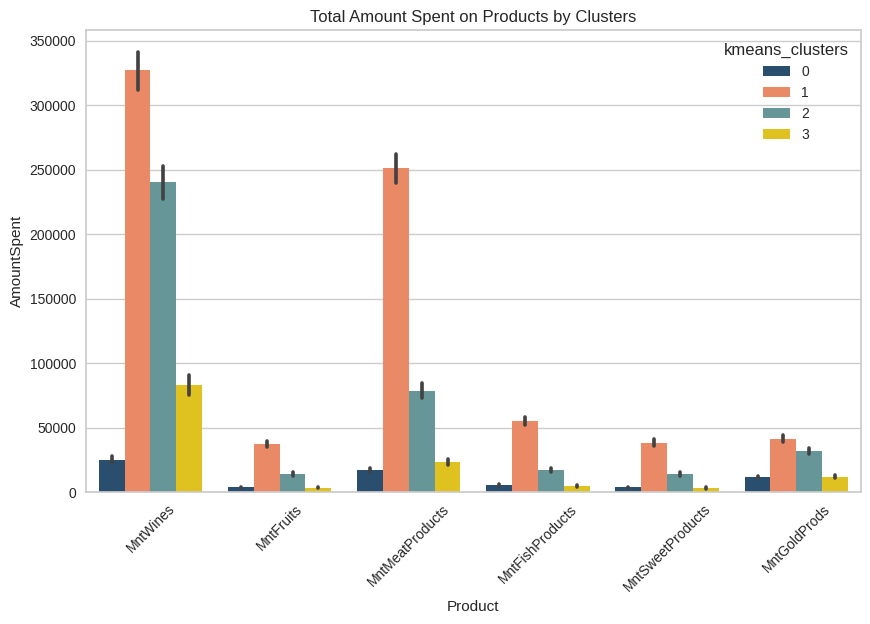

In [71]:
# exploring money spent on each product
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_melted = df.melt(id_vars='kmeans_clusters', value_vars=products, var_name='Product', value_name='AmountSpent')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='AmountSpent', hue='kmeans_clusters', data=df_melted, palette=pal, estimator=sum)
plt.title('Total Amount Spent on Products by Clusters')
plt.xticks(rotation=45)
plt.show()

The previous plot shows that the Wines product is the most successful one, after it Meat products. The rest of products may need more improvement.

In [52]:
# Mapping the encoded values of 'Education' column back to the simplified categories to use it in summary
# Creating a dictionary of the mappings from encoded to original categories
inverse_mapping = dict(zip(le.transform(le.classes_), le.classes_))

# Decoding the encoded values back to the original categories
df['Education_Decoded'] = df['Education'].map(inverse_mapping)

In [53]:
# getting the properties summary for each cluster to try understanding it better

# Define custom aggregation functions for mode and counts
def mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

# Custom function to count occurrences of each value
def count_values(series):
    return series.value_counts().to_dict()

# Group by kmeans_clusters and calculate statistics
cluster_summary = df.groupby('kmeans_clusters').agg({
    'Age': 'median',
    'Education_Decoded': count_values,
    'Family_size': 'median',
    'Marital_Status': count_values,
    'Income': 'mean',
    'Kidhome': count_values,
    'Teenhome': count_values,
    'Total_Promos': count_values,
    'Total_spent': 'mean',
    'Is_parent': count_values
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = [
    'Cluster', 'Age_Median', 'Education', 'Family_Size_Median',
    'Marital_Status_Counts', 'Income_Mean', 'Kidhome_Counts',
    'Teenhome_Counts', 'Total_Promos', 'Total_Spent_Mean',
    'Is_Parent_Counts'
]

# Set index to Cluster and transpose for better readability
cluster_summary.set_index('Cluster', inplace=True)
cluster_summary.T

Cluster,0,1,2,3
Age_Median,54.0,46.0,59.0,59.0
Education,"{'Graduate': 300, 'Postgraduate': 191, 'Underg...","{'Graduate': 308, 'Postgraduate': 183, 'Underg...","{'Graduate': 241, 'Postgraduate': 227, 'Underg...","{'Graduate': 267, 'Postgraduate': 245, 'Underg..."
Family_Size_Median,2.0,2.0,4.0,3.0
Marital_Status_Counts,"{'Married': 188, 'Single': 143, 'Together': 13...","{'Married': 239, 'Single': 166, 'Together': 14...","{'Married': 207, 'Together': 153, 'Single': 77...","{'Married': 223, 'Together': 141, 'Single': 85..."
Income_Mean,75814.655046,30691.572123,42747.692913,60266.820513
Kidhome_Counts,"{0: 531, 1: 14}","{1: 445, 0: 167, 2: 5}","{1: 335, 0: 133, 2: 40}","{0: 452, 1: 93, 2: 1}"
Teenhome_Counts,"{0: 485, 1: 59, 2: 1}","{0: 586, 1: 31}","{1: 468, 2: 26, 0: 14}","{1: 460, 0: 62, 2: 24}"
Total_Promos,"{0: 277, 1: 131, 2: 62, 3: 39, 4: 29, 5: 7}","{0: 521, 1: 68, 2: 27, 3: 1}","{0: 429, 1: 68, 2: 10, 3: 1}","{0: 384, 1: 102, 2: 40, 3: 10, 4: 7, 5: 3}"
Total_Spent_Mean,1377.466055,104.309562,139.665354,841.119048
Is_Parent_Counts,"{0: 471, 1: 74}","{1: 480, 0: 137}",{1: 508},"{1: 521, 0: 25}"


## Conclusion

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.